# Chapter 7. Exploratory analysis for customer behavior

## 7.1 Customer analytics - understanding customer behavior

**Customer analytics:** Customer analytics is a process of understanding and gaining insights into customer behavior through analyzing customer behavior data. It ranges from simple data analysis and visualization to more advanced customer segmentation and predictive analytics. The information and insights gained through customer analytics can then be utilized in forming marketing strategies, optimizing sales channels, and making other key business decisions

The importance of customer analytics is rising. Because access to customer data became easier for many businesses and also because customers now have easier access to data and information on similar products and contents provided by other competitors, it is critical to many businesses to be able to understand and predict what their customers are likely to purchase or view. The deeper the understanding you have about your customers, the better competitive power you will have against your competitors

### Customer analytics use cases

Customer analytics can be used at any point of the marketing process. It can be used to monitor and track how customers interact with the products or react to different marketing strategies. This typically requires using data analysis and visualization techniques to build reports or dashboards that can easily show key performance indicators (KPIs).

#### Sales funnel analytics

By analyzing sales funnel data, we can monitor and track the life cycle of customers, gaining insights such as through which marketing channel they sign up, how often they log into the system, what types of products they browsed and purchased, or how they fall off from each step of the funnel

#### Customer segmentation

Identify different groups of customers based on their behavior. Through identifying subgroups of similar customers, you can better understand the target populations. For example, the marketing strategy for low-engagement customers should be different from the marketing strategies for high-engagement customers. By effectively segmenting the customer base by the level of engagement, you can have a deeper understanding of how different groups of customers behave and react to different marketing strategies. This further helps you better target certain subgroups of customers

#### Predictive analytics

With customer data, you can have a deeper understanding of what attributes and characteristics of customers are highly correlated with the outcomes of your interest. For example, if you'd like to improve the response and engagement rates, you can analyze the data to identify those characteristics of customers that result in higher responses and engagement rates. Then you can build predictive models that predict how likely it is that your customers are going to respond to your marketing messages. 

Another example of the usage of predictive analytics can be for marketing channel optimization. With the insights gained from customer analytics, you can build predictive models to optimize marketing channels. The customers are going to respond differently to different marketing channels. For instance, younger cohorts, who use smartphones more heavily than the rest of the population, are more likely to respond to marketing via smartphones. On the other hand, more senior cohorts are more likely to respond better to marketing on more traditional media, such as TV or newspaper advertisements. With customer analytics, you can identify correlations between certain attributes of customers and the performances of different marketing channels.

## 7.2 Conducting customer analytics with python

In [2]:
import pandas as pd
df = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Analytics on engaged customers

#### Overall engagement rate

In [3]:
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

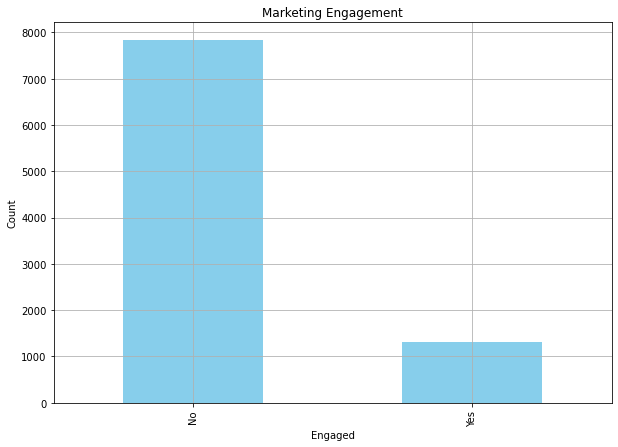

In [5]:
import matplotlib.pyplot as plt
ax = df.groupby('Response').count()['Customer'].plot(
    kind = 'bar',
    color = 'skyblue',
    grid = True,
    figsize = (10, 7),
    title = 'Marketing Engagement'
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()

In [6]:
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

#### Engagement rates by offer type

In [8]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type'
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

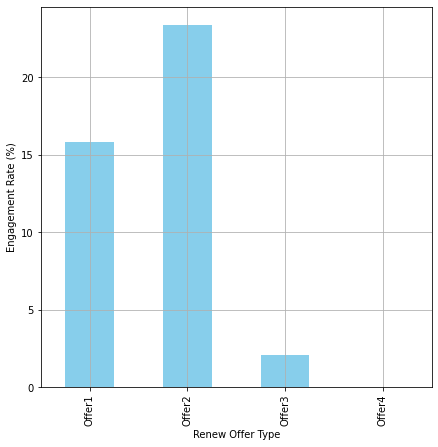

In [9]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

#### Engagement rates by offer type and vehicle class

In [11]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [12]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


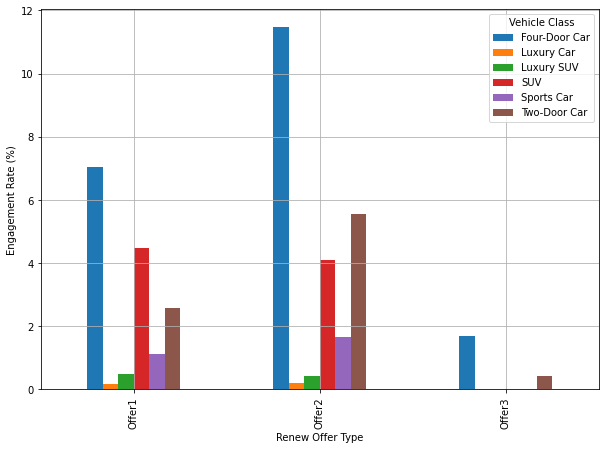

In [13]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

#### Engagement rates by sales channel

In [15]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel'
]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

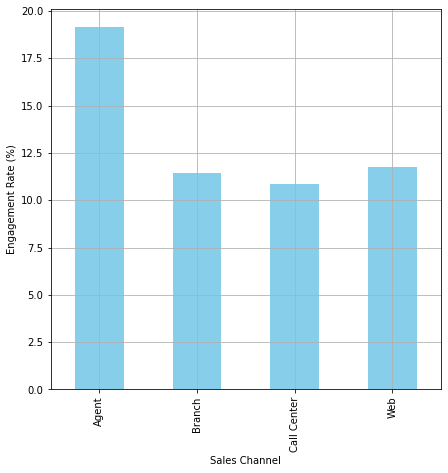

In [16]:
ax = (by_sales_channel_df * 100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

#### Engagement rates by sales channel and vehicle size

In [18]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [19]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


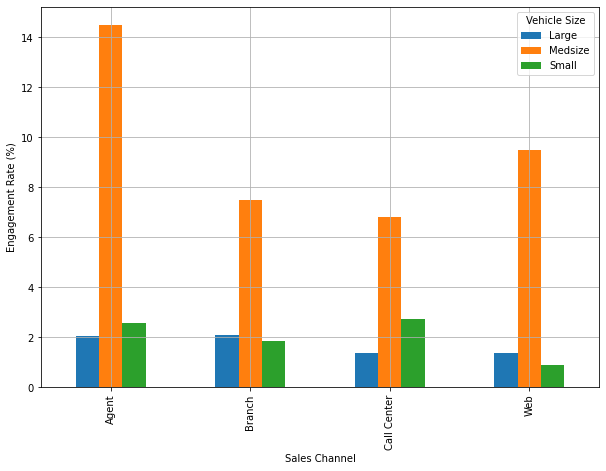

In [20]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

### Segmenting customer base

In [21]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [22]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)

In [23]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [25]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)

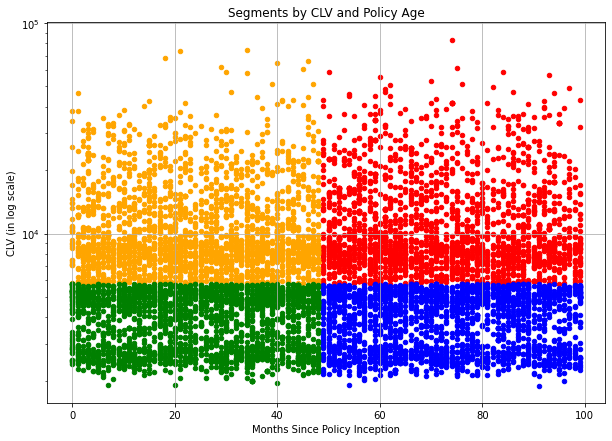

In [27]:
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='red'
)
df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)
df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)
df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)
ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

In [29]:
engagement_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer'] / df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']
engagement_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

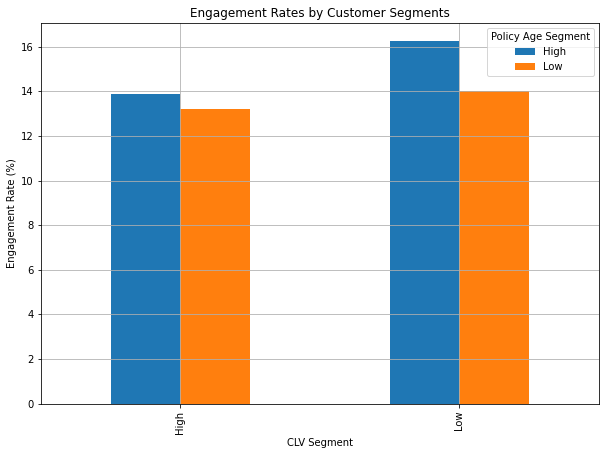

In [32]:
ax = (engagement_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')
plt.show()

## 7.3 Conducting customer analytics with r